In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df_delivery_raw = pd.read_csv('../../Pliki/05_scikit_learn/delivery.csv')
df_delivery_raw.head()

,Distance,CarrierType,Weekend,HolidaysNearby,WeatherCondition,PackageWeight,DeliveredOnTime
0,132.34,Express,Yes,No,Snowy,15.10,No
1,291.95,Overnight,No,Yes,Stormy,5.55,Yes
2,77.43,Standard,Yes,Yes,Rainy,11.59,No
3,97.52,Overnight,Yes,No,Snowy,9.63,Yes
4,451.64,Overnight,Yes,No,Clear,24.76,Yes


In [4]:
df_delivery = df_delivery_raw.copy()

### Analiza

In [5]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Distance          1000 non-null   float64
 1   CarrierType       1000 non-null   object 
 2   Weekend           1000 non-null   object 
 3   HolidaysNearby    1000 non-null   object 
 4   WeatherCondition  1000 non-null   object 
 5   PackageWeight     1000 non-null   float64
 6   DeliveredOnTime   1000 non-null   object 
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


In [6]:
df_delivery.describe()

,Distance,PackageWeight
count,1000.000000,1000.000000
mean,246.916310,12.565810
std,143.452532,7.110071
min,1.270000,0.500000
25%,121.972500,6.455000
50%,251.650000,12.455000
75%,366.670000,18.595000
max,498.530000,24.940000


In [7]:
df_delivery.describe(include='object')

,CarrierType,Weekend,HolidaysNearby,WeatherCondition,DeliveredOnTime
count,1000,1000,1000,1000,1000
unique,3,2,2,4,2
top,Overnight,No,Yes,Rainy,Yes
freq,349,513,528,260,532


Sprawdzenie czy nie ma korelacji pomiędzy wartościami numerycznymi

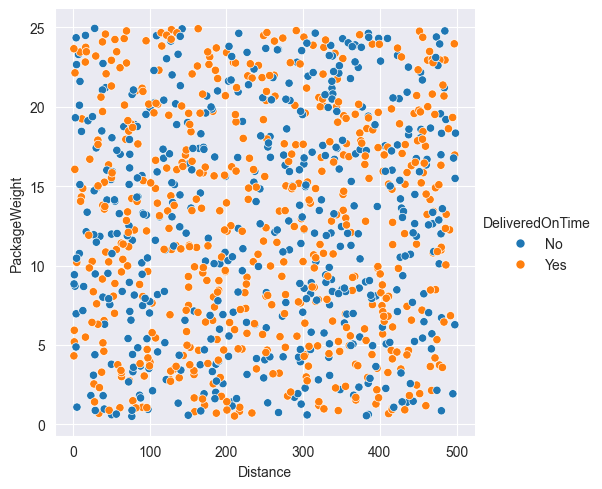

In [8]:
_ = sns.relplot(df_delivery, x='Distance', y='PackageWeight', hue='DeliveredOnTime')

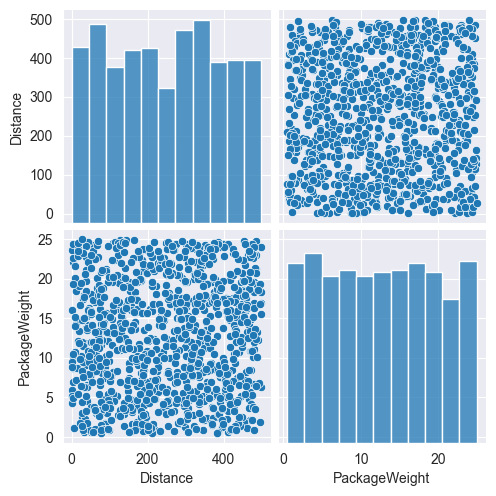

In [10]:
_ = sns.pairplot(df_delivery.drop('DeliveredOnTime', axis=1))

### Transformacja

In [11]:
df_delivery.head()

,Distance,CarrierType,Weekend,HolidaysNearby,WeatherCondition,PackageWeight,DeliveredOnTime
0,132.34,Express,Yes,No,Snowy,15.10,No
1,291.95,Overnight,No,Yes,Stormy,5.55,Yes
2,77.43,Standard,Yes,Yes,Rainy,11.59,No
3,97.52,Overnight,Yes,No,Snowy,9.63,Yes
4,451.64,Overnight,Yes,No,Clear,24.76,Yes


In [12]:
pd.get_dummies(df_delivery, dtype='float')

,Distance,PackageWeight,CarrierType_Express,CarrierType_Overnight,CarrierType_Standard,Weekend_No,Weekend_Yes,HolidaysNearby_No,HolidaysNearby_Yes,WeatherCondition_Clear,WeatherCondition_Rainy,WeatherCondition_Snowy,WeatherCondition_Stormy,DeliveredOnTime_No,DeliveredOnTime_Yes
0,132.34,15.10,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,291.95,5.55,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,77.43,11.59,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,97.52,9.63,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,451.64,24.76,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,238.70,14.03,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
996,17.53,23.47,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,24.87,6.42,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
998,305.25,2.74,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
df_delivery = pd.get_dummies(df_delivery, dtype='float', drop_first=True)

In [14]:
df_delivery.head()

,Distance,PackageWeight,CarrierType_Overnight,CarrierType_Standard,Weekend_Yes,HolidaysNearby_Yes,WeatherCondition_Rainy,WeatherCondition_Snowy,WeatherCondition_Stormy,DeliveredOnTime_Yes
0,132.34,15.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,291.95,5.55,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,77.43,11.59,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,97.52,9.63,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,451.64,24.76,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [19]:
df_delivery = df_delivery.rename(
    {'Weekend_Yes': 'Weekend', 'HolidaysNearby_Yes': 'HolidaysNearby', 'DeliveredOnTime_Yes': 'DeliveredOnTime'},
    axis=1)

In [20]:
df_delivery.head()

,Distance,PackageWeight,CarrierType_Overnight,CarrierType_Standard,Weekend,HolidaysNearby,WeatherCondition_Rainy,WeatherCondition_Snowy,WeatherCondition_Stormy,DeliveredOnTime
0,132.34,15.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,291.95,5.55,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,77.43,11.59,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,97.52,9.63,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,451.64,24.76,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Sprawdzenie czy na wszystkich wartościach nie ma korelacji

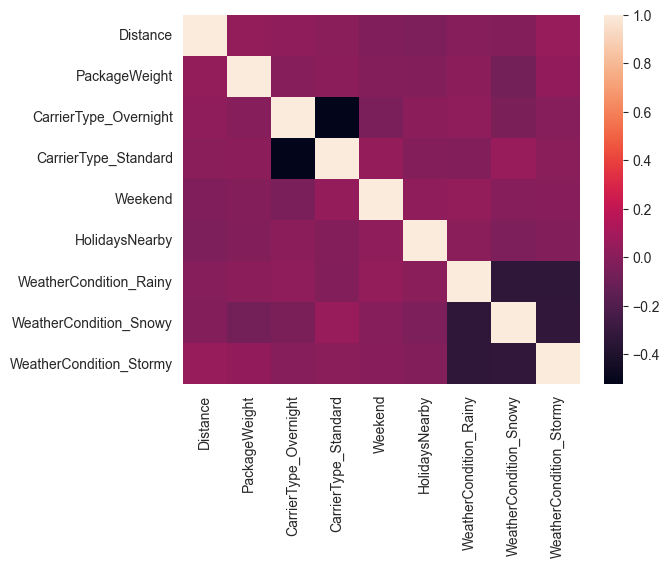

In [22]:
_ = sns.heatmap(df_delivery.drop('DeliveredOnTime', axis=1).corr())

Korelacja jeśli zostawimy wszystkie kolumny

In [23]:
df_c = df_delivery_raw.copy()
df_c = pd.get_dummies(df_c, dtype='float')

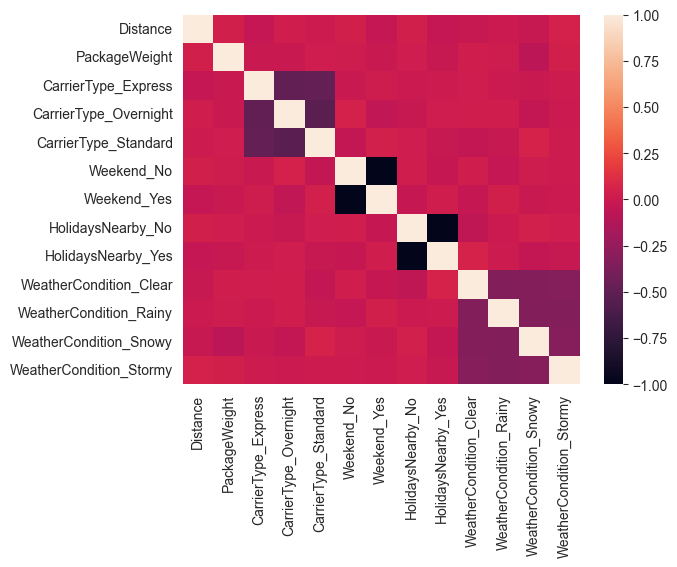

In [26]:
_ = sns.heatmap(df_c.drop(['DeliveredOnTime_Yes', 'DeliveredOnTime_No'], axis=1).corr())

Podział cech i etykiet

In [27]:
data = df_delivery
target = df_delivery.pop('DeliveredOnTime')

In [28]:
data.head()

,Distance,PackageWeight,CarrierType_Overnight,CarrierType_Standard,Weekend,HolidaysNearby,WeatherCondition_Rainy,WeatherCondition_Snowy,WeatherCondition_Stormy
0,132.34,15.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,291.95,5.55,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,77.43,11.59,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,97.52,9.63,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,451.64,24.76,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
target.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: DeliveredOnTime, dtype: float64

Podział na zbiór treningowy i testowy

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=5)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 9)
(250, 9)
(750,)
(250,)


Standaryzacja kolumn numerycznych dla zbioru testowego i treningowego

In [33]:
df_delivery.head()

,Distance,PackageWeight,CarrierType_Overnight,CarrierType_Standard,Weekend,HolidaysNearby,WeatherCondition_Rainy,WeatherCondition_Snowy,WeatherCondition_Stormy
0,132.34,15.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,291.95,5.55,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,77.43,11.59,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,97.52,9.63,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,451.64,24.76,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  =scaler.transform(X_test)

In [36]:
X_train

array([[-0.42046715,  1.59350252,  1.38502272, ...,  1.71076052,
        -0.57632387, -0.557843  ],
       [-0.87995061, -1.37997726, -0.72200982, ..., -0.58453535,
        -0.57632387, -0.557843  ],
       [-0.44910132, -1.41696792,  1.38502272, ..., -0.58453535,
        -0.57632387,  1.79261907],
       ...,
       [-1.08735486,  0.10249447, -0.72200982, ..., -0.58453535,
         1.7351355 , -0.557843  ],
       [ 0.66235474,  0.59475476, -0.72200982, ..., -0.58453535,
        -0.57632387,  1.79261907],
       [-0.74585545, -0.20765796,  1.38502272, ...,  1.71076052,
        -0.57632387, -0.557843  ]])

In [37]:
X_test

array([[ 1.50013286, -1.61330295, -0.72200982, ...,  1.71076052,
        -0.57632387, -0.557843  ],
       [-1.19520789, -1.70862503, -0.72200982, ..., -0.58453535,
         1.7351355 , -0.557843  ],
       [ 0.90395115,  0.76121272,  1.38502272, ..., -0.58453535,
         1.7351355 , -0.557843  ],
       ...,
       [ 0.89318696,  1.71158808,  1.38502272, ..., -0.58453535,
        -0.57632387, -0.557843  ],
       [-0.48814792,  1.44553988,  1.38502272, ..., -0.58453535,
        -0.57632387, -0.557843  ],
       [ 0.58179915, -0.44098365, -0.72200982, ..., -0.58453535,
         1.7351355 , -0.557843  ]])

### Uczenie

Trening modelu

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = log_regression.predict(X_test)
y_pred

array([1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0.

Ocena dokładności

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[115,   0],
       [  2, 133]], dtype=int64)

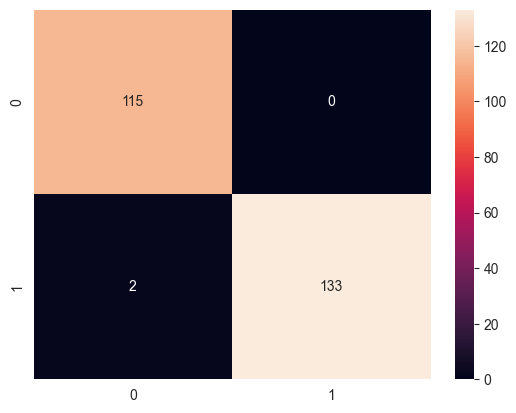

In [44]:
_ = sns.heatmap(cm, annot=True, fmt='d')

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
acc = accuracy_score(y_test, y_pred)
acc

0.992

In [49]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       115
         1.0       1.00      0.99      0.99       135

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

